# Practical Session 2: Classification algorithms

## 0.1 Your task

In practical 1, you worked with a housing prices (and bike sharing) datasets on the tasks that required you to predict some value (e.g., price of a house) or amount (e.g., the count of rented bikes) based on a number of attributes – age of the house, number of rooms, income level of the house owners for the house price prediction (or weather conditions and time of the day for the prediction of the number of rented bikes). That is, you were predicting some continuous value.

This time, your task is to predict a particular category the instance belongs to based on its characteristics. This type of tasks is called *classification*.

## 0.2 Datasets

First you will look into the famous [*Iris dataset*](https://en.wikipedia.org/wiki/Iris_flower_data_set) which was first introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems*. The dataset contains $4$ characteristics (sepal length and width, and petal length and width) for $3$ related species of irises – *setosa*, *versicolor* and *virginica*. Your task is to learn to predict, based on the $4$ characteristics, the type of an iris. 

The second dataset is [*digits* dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) which contains $1797$ images of $10$ hand-written digits. The digits have been preprocessed so that $32 \times 32$ bitmaps are divided into nonoverlapping blocks of $4 \times 4$ and the number of on pixels are counted in each block. This generates an input matrix of $8 \times 8$ where each element is an integer in the range of $[0, ..., 16]$. This reduces dimensionality and gives invariance to small distortions.

For further information on NIST preprocessing routines applied to this data, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, *NIST Form-Based Handprint Recognition System*, NISTIR 5469, 1994.

## 0.3 Learning objectives

In this practical you will learn about: 
- .
- ..
- ...

In addition, you will learn about the dataset uploading routines with `sklearn`.

## Step 1: Uploading and inspecting the data

As before, let's start by uploading and looking into the data. `sklearn` has a number of datasets to practice your ML skills on, and `iris` dataset is one of them. Here is how you can access a dataset through `sklearn`. Note that such data fields as *data* and *target* are already pre-defined for you:

In [361]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

Take a look into what is contained in *data*. Remember that each instance of an iris is described in terms of $4$ variables – *sepal length*, *sepal width*, *petal length* and *petal width*:

In [362]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

To find out what variables are contained in `data`, check the `feature_names` data field.

In [363]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

What about the target values?

In [364]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

There are $3$ classes of irises – *setosa*, *versicolor* and *virginica*, and they are already converted into numerical values for you (recall, that when the dataset is not already preprocessed this way and the target or any of the arrtibutes are represented as text or categorical data, you need to convert them into numerical data). If you want to check what each numerical label corresponds to in the original data, you can do so accessing the `target_names` data field:

In [365]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Remember, that for further ML experiments, we need to have two data structures: the instance-by-attributes matrix $X$ and the target labels vector $y$. For instance, in the previous practical the regression algorithm learned the vector of weights $w$ to predict the target variable $\hat y^{(i)}$ for each instance $i$ so that its prediction would be maximally close to the actual label $y^{(i)}$. Since the labels $y^{(i)}$ were continuous (i.e., amount, number or value), you measured the performance of your regressor by the distance between the predictions $\hat y$ and actual labels $y$. In this practical, you will need to work with $X$ and $y$, too, but the vector of $y$ this time will contain discrete values – classes $[0, 1, 2]$ for the different types of the flower.

As you might have already figured out, you need to initialise $X$ and $y$ with the `data` and `target` fields of your iris dataset: 

In [366]:
X, y = iris["data"], iris["target"]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Let's look closer into the data to get a feel for what is contained in it. As before, let's use visualisation with `matplotlib`, and in particular plot one attribute against another for the three types of irises using scatterplot. E.g., let's plot sepal length vs. sepal width:

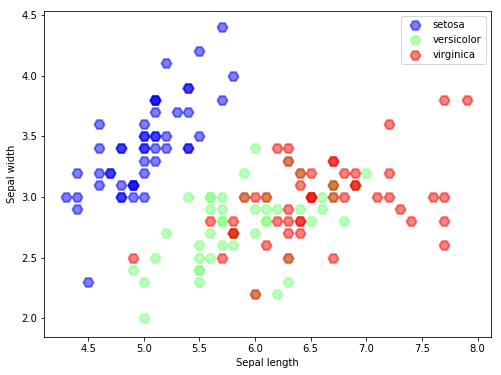

In [367]:
%matplotlib inline 
#so that the plot will be displayed in the notebook
import numpy as np
np.random.seed(42)

import matplotlib
from matplotlib import pyplot as plt

# visualise sepal length vs. sepal width
X = iris.data[:, :2]  
y = iris.target

scatter_x = np.array(X[:, 0])
scatter_y = np.array(X[:, 1])
group = np.array(y)
cmap = matplotlib.cm.get_cmap('jet')
cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
labels = iris.target_names


fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], 
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)
ax.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.show()

It looks like *setosa* is quite clearly distiguishable from the other two types of irises with these two features. What about petal length and width?

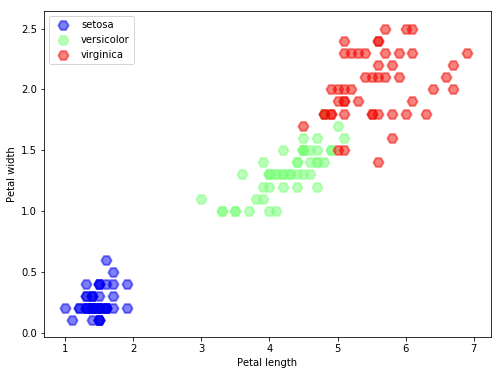

In [368]:
# visualise petal length vs. petal width
X = iris.data[:, 2:]  
y = iris.target

scatter_x = np.array(X[:, 0])
scatter_y = np.array(X[:, 1])
group = np.array(y)
cmap = matplotlib.cm.get_cmap('jet')
cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
labels = iris.target_names


fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], 
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)
ax.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()

This plot shows an even clearer sepatation between the class of *setosa* irises and the other two classes. In fact, with respect to these two attributes, it might be possible to clearly separate not only *setosas* from the other two classes, but also *versicolors* from *virginicas*. 

When the data can be separated by a straight line as in the example above, you call it *linearly separable*. In fact, there is a whole set of lines that you can use to separate *setosas* from *versicolors* and *virginicas*. Later in the practical, you'll look into how to select the best line among the variety of possible separation lines:

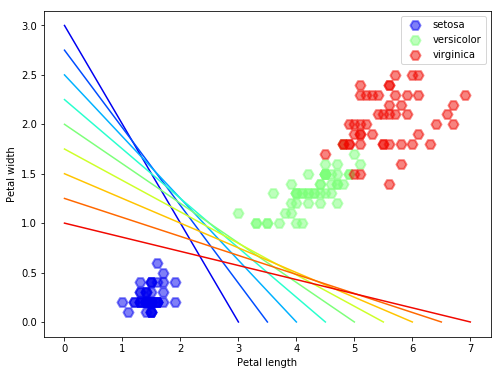

In [369]:
# visualise petal length vs. petal width
X = iris.data[:, 2:]  
y = iris.target

scatter_x = np.array(X[:, 0])
scatter_y = np.array(X[:, 1])
group = np.array(y)
cmap = matplotlib.cm.get_cmap('jet')
cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
labels = iris.target_names


fig, ax = plt.subplots(figsize=(8, 6))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], 
               label = labels[g], s = 100, marker = "H", 
               linewidth=2, alpha = 0.5)
ax.legend()
plt.xlabel('Petal length')
plt.ylabel('Petal width')

for i in range(0, 9):
    plt.plot([3 + 0.5*i, 0], [0, 3-0.25*i], 'k-', color=cmap(0.1*(i+1)))

plt.show()

For the sake of consistency, let's plot all the pairs of features against each other. Note that all plots confirm that *setosas* are linearly separable from the other two types of irises, while *versicolors* are linearly separable from *virginicas* on some attributes:

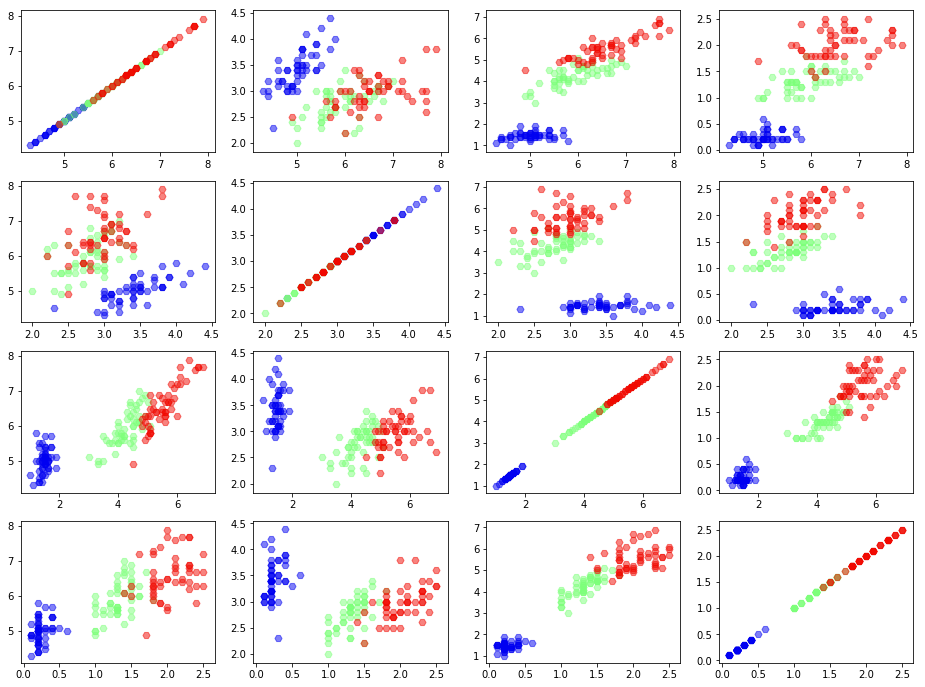

In [370]:
fig = plt.figure(figsize=(16, 12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

X = iris.data
y = iris.target
labels = iris.target_names
index = 1

for i in range(0, X.shape[1]):
    for j in range(0, X.shape[1]):
        scatter_x = np.array(X[:, i])
        scatter_y = np.array(X[:, j])
        group = np.array(y)
        cmap = matplotlib.cm.get_cmap('jet')
        cdict = {0: cmap(0.1), 1: cmap(0.5), 2: cmap(0.9)}
        
        ax = fig.add_subplot(X.shape[1], X.shape[1], index)
        index+=1
        
        for g in np.unique(group):
            ix = np.where(group == g)
            ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], 
                       label = labels[g], s = 50, marker = "H", 
                       linewidth=1, alpha = 0.5)

plt.show()

## Step 2: Splitting into training and test subsets

Before applying the classifiers, let's split the dataset into training and test set. Recall, that when building an ML model all further data exploration, feature selection and scaling, model selection and fine-tuning should be done on the training data, and the test data should be used to evaluate the model:

In [371]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(X, test_size=0.2)
print(len(train_set), "training instances +", len(test_set), "test instances")

120 training instances + 30 test instances


As before, you want your training and test data to contain enough representative examples of each class, that is, you might want to apply `StratifiedShuffleSplit` rather than random split:

In [372]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.get_n_splits(X, y)
print(split)       

for train_index, test_index in split.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
TRAIN: 120 TEST: 30
(120, 4) (120,) (30, 4) (30,)


Let's check the class proportions in the original dataset, and training and test datasets:

In [373]:
import pandas as pd

def original_proportions(data):
    props = {}
    for value in set(data["target"]):
        data_value = [i for i in data["target"] if i==value]
        props[value] = len(data_value) / len(data["target"])
    return props

def subset_proportions(subset):
    props = {}
    for value in set(subset):
        data_value = [i for i in subset if subset[i]==value]
        props[value] = len(data_value) / len(subset)
    return props

   
compare_props = pd.DataFrame({
    "Overall": original_proportions(iris),
    "Stratified tr": subset_proportions(y_train),
    "Stratified ts": subset_proportions(y_test),
})
compare_props["Strat. tr %error"] = 100 * compare_props["Stratified tr"] / compare_props["Overall"] - 100
compare_props["Strat. ts %error"] = 100 * compare_props["Stratified ts"] / compare_props["Overall"] - 100

compare_props.sort_index()

,Overall,Stratified tr,Stratified ts,Strat. tr %error,Strat. ts %error
0,0.333333,0.333333,0.333333,-1.421085e-14,-1.421085e-14
1,0.333333,0.333333,0.333333,-1.421085e-14,-1.421085e-14
2,0.333333,0.333333,0.333333,-1.421085e-14,-1.421085e-14


The original dataset is well-balanced – it contains exactly $50$ examples for each class. With the startified data splits, you get equal proportion of the irises of each type in the training and test sets, too.

Now, let's first approach the classification task in a simpler setting: let's start with *binary classification* and try to predict whether an iris is of a particular type (e.g., *setosa*) or not.


## Binary classification

Let's separate the data that is *setosa* from other data.

In [374]:
y_train_setosa = (y_train == 0) # True when the label is 0 (i.e., setosa)
y_test_setosa = (y_test == 0)
y_test_setosa

array([ True, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True])

Test on an example that is *setosa* – for instance, on the first instance in the test set.

TODO: Introduce Logistic Regression.

In [375]:
setosa_example = X_test[0]

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_setosa)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [376]:
log_reg.predict([setosa_example])

array([ True])

You might have used Naive Bayes in the past – for example, in the previous courses. Let's compare the performance to Naive Bayes.

TODO: Discuss Naive Bayes.

In [377]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train_setosa)
gnb.predict([setosa_example])

array([ True])

Finally, let's look into one more linear classifier – Perceptron implemented with `SGDClassifier` in `sklearn`.

TODO: Introduce `SGDClassifier`.

In [378]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None, random_state=42,
                   loss="perceptron", eta0=1, learning_rate="constant", penalty=None)
sgd.fit(X_train, y_train_setosa)
sgd.predict([setosa_example])

array([ True])

All three classifiers work well, but you've seen before that *setosa* is linearly separable. For comparison, let's select a more challenging example that is not clearly linearly separable – take *versicolor* (class $1$), for instance: 

In [379]:
y_train_versicolor = (y_train == 1) # True when the label is 0 (i.e., versicolor)
y_test_versicolor = (y_test == 1)
y_test_versicolor

array([False, False,  True,  True, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False])

Examples $3$, $5$, $13$ and so on are instances of *versicolor*. Let's test our classifiers on one of them:

In [380]:
versicolor_example = X_test[17] # try out examples 3, 5, 13 and 17
print("Class", y_test[17], "(", iris.target_names[y_test[17]], ")")

log_reg.fit(X_train, y_train_versicolor)
gnb.fit(X_train, y_train_versicolor)
sgd.fit(X_train, y_train_versicolor)

print(log_reg.predict([versicolor_example]))
print(gnb.predict([versicolor_example]))
print(sgd.predict([versicolor_example]))

Class 1 ( versicolor )
[ True]
[ True]
[False]


As you can see, not all classifiers this time perform well. How do you measure the performance in a more comprehensive way?

## Performance measures

Accuracy.

TODO: Introduce accuracy.

In [381]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(log_reg, X_train, y_train_setosa, cv=3, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train_setosa, cv=3, scoring="accuracy"))
print(cross_val_score(sgd, X_train, y_train_setosa, cv=3, scoring="accuracy"))

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


What about the *versicolor* class:

In [382]:
print(cross_val_score(log_reg, X_train, y_train_versicolor, cv=3, scoring="accuracy"))
print(cross_val_score(gnb, X_train, y_train_versicolor, cv=3, scoring="accuracy"))
print(cross_val_score(sgd, X_train, y_train_versicolor, cv=3, scoring="accuracy"))

[0.70731707 0.65       0.69230769]
[0.92682927 0.925      0.92307692]
[0.36585366 0.7        0.66666667]


The numbers differ but it still doesn't tell you much about the performance of the classifier – is $0.70$ accuracy good? Let's implement a very simple classifier that will predict *not versicolor* for every instance. Here is how well it will perform:

In [383]:
from sklearn.base import BaseEstimator

class NotXClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
notversicolor_clf = NotXClassifier()
cross_val_score(notversicolor_clf, X_train, y_train_versicolor, cv=3, scoring="accuracy")

array([0.65, 0.7 , 0.65])

This gives you a very clear benchmark for comparison. The above represents a *majority class baseline*: for each split in cross-validation splits, it measures the proportion of the majority class (not versicolor in this case). If the classifier does nothing and simply returns the majority class every time, this is how "well" it will perform. Now you can interpret the performance of actual classifiers on the same sets.

## Confusion matrix

Helps you measure where the classifier is wrong. 

TODO: Introduce confusion matrix.

In [384]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(log_reg, X_train, y_train_setosa, cv=3)
confusion_matrix(y_train_setosa, y_train_pred)

array([[80,  0],
       [ 0, 40]])

In [385]:
y_train_pred = cross_val_predict(gnb, X_train, y_train_setosa, cv=3)
confusion_matrix(y_train_setosa, y_train_pred)

array([[80,  0],
       [ 0, 40]])

In [386]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train_versicolor, cv=3)
confusion_matrix(y_train_versicolor, y_train_pred)

array([[72,  8],
       [30, 10]])

In [387]:
y_train_pred = cross_val_predict(gnb, X_train, y_train_versicolor, cv=3)
confusion_matrix(y_train_versicolor, y_train_pred)

array([[76,  4],
       [ 5, 35]])

TODO: Introduce precision, recall and F1.

In [388]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = cross_val_predict(gnb, X_train, y_train_versicolor, cv=3)
precision = precision_score(y_train_versicolor, y_train_pred) # == 35 / (35 + 4)
recall = recall_score(y_train_versicolor, y_train_pred) # == 35 / (35 + 5)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

y_train_pred = cross_val_predict(log_reg, X_train, y_train_versicolor, cv=3)
precision = precision_score(y_train_versicolor, y_train_pred) # == 10 / (10 + 8)
recall = recall_score(y_train_versicolor, y_train_pred) # == 10 / (10 + 30)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

0.8974358974358975 0.875 0.8860759493670887
0.5555555555555556 0.25 0.3448275862068966


## Precision-recall trade-off

Often, you can achieve perfect precision if you lower the recall – for example, by always predicting *versicolor* you will reach perfect recall (all *versicolor* instances will be covered by such prediction), but very low precision (because in most of the cases such prediction will be unreliable because your classifier will predict *versicolor* for all setosas and all virginicas). The opposite is true as well: by trying to maximise precision, you will often need to constrain your classifier so that it returns less false positives and therefore is more conservative.

There are tasks where you would want to optimise for high precision (for example, ...) and where you would want to optimise for high recall (for example, ....).

TODO: Introduce `decision_function`.

In [389]:
log_reg.fit(X_train, y_train_versicolor)

y_scores = log_reg.decision_function([versicolor_example])
y_scores

array([0.07850106])

In [390]:
threshold = 0
y_versicolor_pred = (y_scores > threshold)
y_versicolor_pred

array([ True])

In [391]:
threshold = 1
y_versicolor_pred = (y_scores > threshold)
y_versicolor_pred

array([False])

Look at all the scores in training set:

In [392]:
y_scores = cross_val_predict(log_reg, X_train, y_train_versicolor, cv=3, method="decision_function")
y_scores

array([-1.29950182, -0.52544432,  0.10785581, -1.23939843, -0.22791773,
       -0.10485249, -0.31881365,  0.05314131, -0.13862802, -0.60847765,
        0.36505267, -0.50152234,  0.27691224,  0.00904489, -0.15927041,
       -1.45938541, -2.24360905,  0.59014062, -0.37415706, -1.81006106,
        0.28683298, -2.07013299, -0.51453892, -1.14919123,  0.04804098,
       -0.10192989, -0.13530465, -1.84802807, -0.80512655, -2.03452008,
       -2.2384483 , -0.43488076, -0.42163665, -2.91818356, -0.65068428,
       -1.40354689, -0.26002727, -0.71158798, -1.20707373, -1.03846986,
       -1.95429403, -0.27227757, -2.4189426 ,  0.53792514, -0.97708   ,
       -1.79084941, -0.60505897, -1.31648885, -0.22553545, -0.91908009,
       -1.15301956, -0.89069803, -1.66354219, -0.34260708, -1.67387967,
       -0.917963  , -0.48757297, -1.85448621, -1.47988521, -0.60505897,
       -1.47424183,  0.17298523, -0.49134427, -1.50663392, -0.1362101 ,
       -0.05392274,  0.81531373, -0.96141211, -0.06854646, -1.46

TODO: Introduce precision-recall curve.

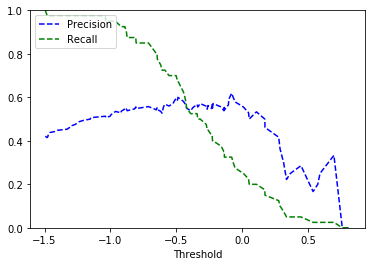

In [393]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_versicolor, y_scores)

def plot_pr_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_pr_vs_threshold(precisions, recalls, thresholds)
plt.show()

## ROC curve

Another way to look into the results, is to estimate and plot ROC curve.

TODO: Introduce ROC curve and AUC.

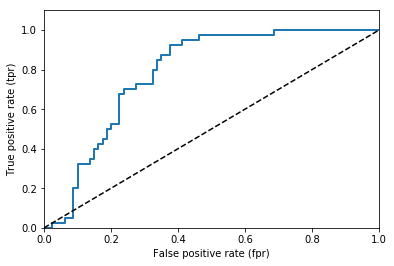

In [394]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_versicolor, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1.1])
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    
plot_roc_curve(fpr, tpr)
plt.show()

In [395]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_versicolor, y_scores)

0.7840625

Compare to the Naive Bayes classifier:

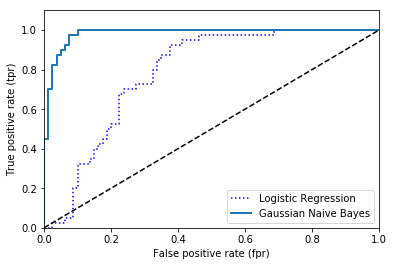

In [396]:
y_probas_gnb = cross_val_predict(gnb, X_train, y_train_versicolor, cv=3, method="predict_proba")
y_scores_gnb = y_probas_gnb[:, 1] # score = proba of the positive class
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_train_versicolor, y_scores_gnb)

plt.plot(fpr, tpr, "b:", label="Logistic Regression")
plot_roc_curve(fpr_gnb, tpr_gnb, "Gaussian Naive Bayes")
plt.legend(loc="lower right")
plt.show()

In [397]:
roc_auc_score(y_train_versicolor, y_scores_gnb)

0.9828125000000001

## Kernel trick 

TODO: Introduce kernel trick.

This submodule contains functions that approximate the feature mappings that correspond to certain kernels, as they are used for example in support vector machines (see Support Vector Machines). The following feature functions perform non-linear transformations of the input, which can serve as a basis for linear classification or other algorithms.
The advantage of using approximate explicit feature maps compared to the kernel trick, which makes use of feature maps implicitly, is that explicit mappings can be better suited for online learning and can significantly reduce the cost of learning with very large datasets. Standard kernelized SVMs do not scale well to large datasets, but using an approximate kernel map it is possible to use much more efficient linear SVMs. In particular, the combination of kernel map approximations with SGDClassifier can make non-linear learning on large datasets possible.

http://scikit-learn.org/stable/modules/kernel_approximation.html


In [398]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

X = [[0, 0], [1, 1], [1, 0], [0, 1]]
y = [0, 0, 1, 1]
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X)
clf = SGDClassifier(max_iter=5)
clf.fit(X_features, y)   

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [399]:
clf.score(X_features, y)

1.0

Example on the iris data. Since *versicolor* is not linearly separable from the other two, let's apply kernel trick and estimate the results:

In [400]:
rbf_features = RBFSampler(gamma=1, random_state=42)
X_train_features = rbf_features.fit_transform(X_train)
sgd_rbf = SGDClassifier(max_iter=5, random_state=42, loss="perceptron", 
                        eta0=1, learning_rate="constant", penalty=None)
sgd_rbf.fit(X_train_features, y_train_versicolor) 

sgd_rbf.score(X_train_features, y_train_versicolor)

0.975

In [401]:
y_train_pred = cross_val_predict(sgd, X_train, y_train_versicolor, cv=3)
precision = precision_score(y_train_versicolor, y_train_pred)
recall = recall_score(y_train_versicolor, y_train_pred)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

y_train_pred = cross_val_predict(sgd_rbf, X_train_features, y_train_versicolor, cv=3)
precision = precision_score(y_train_versicolor, y_train_pred)
recall = recall_score(y_train_versicolor, y_train_pred)
f1 = f1_score(y_train_versicolor, y_train_pred)
print(precision, recall, f1)

0.40350877192982454 0.575 0.4742268041237113
0.8666666666666667 0.975 0.9176470588235294


Ok, much better!

##  Multi-class classification

Now remember that your actual goal is to build a three-way classifier that can predict *setosa*, *versicolor* and *virginica* classes, and not just tell whether an instance is *setosa* or not. Actually, you are half-way there, and here is why.

Multi-class classification follows one of two routes. Either implements one-vs-all (one-vs-rest) or one-vs-one classification.

In [428]:
sgd.fit(X_train, y_train) # i.e., all instances, not just one class
print(sgd.predict([setosa_example]))
print(sgd.predict([versicolor_example]))

[0]
[2]


Incorrect prediction, so let's try the RBF kernel:

In [429]:
sgd_rbf.fit(X_train_features, y_train) # i.e., all instances, not just one class
X_test_features = rbf_features.fit_transform(X_test)
setosa_rbf_example = X_test_features[0]
versicolor_rbf_example = X_test_features[17]

print(sgd_rbf.predict([setosa_rbf_example]))
print(sgd_rbf.predict([versicolor_rbf_example]))

[0]
[1]


Setosa correct and versicolor incorrect! Let's see what logic the classifier followed:

In [430]:
setosa_scores = sgd_rbf.decision_function([setosa_rbf_example])
print(setosa_scores)

# check which class gets the maximum score
prediction = np.argmax(setosa_scores)
print(prediction)
# check which class this corresponds to in the classifier
print(sgd_rbf.classes_[prediction])
print(iris.target_names[sgd_rbf.classes_[prediction]])

[[ 0.77894021 -1.40295366 -1.50867329]]
0
0
setosa


I.e., a much higher score for the class of setosa. What about the versicolor example:

In [431]:
versicolor_scores = sgd_rbf.decision_function([versicolor_rbf_example])
print(versicolor_scores)
prediction = np.argmax(versicolor_scores)
print(prediction)
print(iris.target_names[sgd_rbf.classes_[prediction]])

[[-1.01627319  1.48972172 -1.82550937]]
1
versicolor


For comparison, let's see what the original SGD classifier (without RBF kernel) predicted:

In [432]:
versicolor_scores = sgd.decision_function([versicolor_example])
print(versicolor_scores)
prediction = np.argmax(versicolor_scores)
print(prediction)
print(iris.target_names[sgd.classes_[prediction]])

[[ -4.43 -69.42  24.63]]
2
virginica


So, the original classifier not only predicted the class incorrectly, but it also put the correct class as its third choice only!

Now, let's use `sklearn`'s `OneVsOneClassifier` and `OneVsRestClassifier`. Note that you're essentially using the same classifier as before, and it is just the framework within which the predictions are made:

In [433]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42, loss="perceptron", 
                                           eta0=1, learning_rate="constant", penalty=None))
ovo_clf.fit(X_train_features, y_train)
ovo_clf.predict([versicolor_rbf_example])

array([1])

In [434]:
len(ovo_clf.estimators_)

3

Let's look into Naive Bayes:

In [435]:
gnb.fit(X_train, y_train)
gnb.predict([versicolor_example])

array([1])

In [436]:
gnb.predict_proba([versicolor_example])

array([[1.52231199e-63, 9.99994982e-01, 5.01792480e-06]])

In [437]:
ovo_clf.decision_function([versicolor_rbf_example])

array([[ 0.94967226,  2.5       , -0.44967226]])

I.e., a much clearer prediction with a larger margin! Note that most classifiers use either `predict_proba` or `decision_function` for the same purpose. Now let's look into the cross-validated performance:

In [438]:
cross_val_score(ovo_clf, X_train_features, y_train, cv=3, scoring="accuracy")

array([0.95238095, 0.94871795, 0.94871795])

In [439]:
cross_val_score(gnb, X_train, y_train, cv=3, scoring="accuracy")

array([0.92857143, 0.97435897, 0.97435897])

Finally, remember scaling:

In [441]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_features_scaled = scaler.fit_transform(X_train_features.astype(np.float64))

print(cross_val_score(ovo_clf, X_train_features_scaled, y_train, cv=3, scoring="accuracy"))
print(cross_val_score(gnb, X_train_scaled, y_train, cv=3, scoring="accuracy"))

[0.95238095 0.97435897 0.94871795]
[0.92857143 0.97435897 0.97435897]


## Error analysis

Finally, let's look into the errors made by the classifiers:

In [442]:
y_train_pred = cross_val_predict(ovo_clf, X_train_features_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  4, 36]])

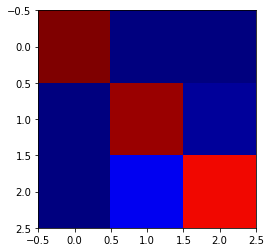

In [443]:
plt.imshow(conf_mx, cmap = "jet")
plt.show()

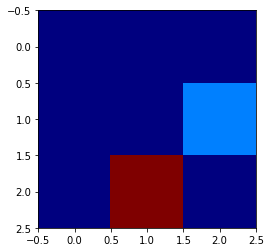

In [445]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.imshow(norm_conf_mx, cmap = "jet")
plt.show()

## Final steps – evaluating on the test set

In [447]:
from sklearn.metrics import accuracy_score

X_test_features_scaled = scaler.fit_transform(X_test_features.astype(np.float64))
y_pred = ovo_clf.predict(X_test_features_scaled)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [449]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.9696969696969696 0.9666666666666667 0.9665831244778613


With Naive Bayes classifier:

In [452]:
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
y_pred = gnb.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.3333333333333333

In [453]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(precision, recall, f1)

0.1111111111111111 0.3333333333333333 0.16666666666666666


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#  Assignment: Handwritten digits dataset

In [454]:
from sklearn import datasets
digits = datasets.load_digits()
list(digits.keys())

['data', 'target', 'target_names', 'images', 'DESCR']

In [455]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [456]:
X, y = digits["data"], digits["target"]
X.shape

(1797, 64)

In [457]:
y.shape

(1797,)

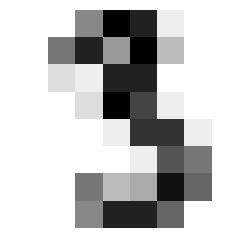

In [458]:
some_digit = X[3]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [459]:
y[3]

3

Your own implementation of the stratified shuffle split:

In [ ]:
# TODO: Implement own shuffle split!

In [464]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split.get_n_splits(X, y)
print(split)       

for train_index, test_index in split.split(X, y):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
TRAIN: 1437 TEST: 360
(1437, 64) (1437,) (360, 64) (360,)


In [461]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                    stratify=y, 
                                                    test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1437, 64) (1437,) (360, 64) (360,)


In [465]:
def original_proportions(data):
    props = {}
    for value in set(data["target"]):
        data_value = [i for i in data["target"] if i==value]
        props[value] = len(data_value) / len(data["target"])
    return props

def subset_proportions(subset):
    props = {}
    for value in set(subset):
        data_value = [i for i in subset if subset[i]==value]
        props[value] = len(data_value) / len(subset)
    return props


compare_props = pd.DataFrame({
    "Overall": original_proportions(digits),
    "Stratified tr": subset_proportions(y_train),
    "Stratified ts": subset_proportions(y_test),
})
compare_props["Strat. tr %error"] = 100 * compare_props["Stratified tr"] / compare_props["Overall"] - 100
compare_props["Strat. ts %error"] = 100 * compare_props["Stratified ts"] / compare_props["Overall"] - 100

compare_props.sort_index()

,Overall,Stratified tr,Stratified ts,Strat. tr %error,Strat. ts %error
0,0.099054,0.201809,0.000000,103.736717,-100.000000
1,0.101280,0.100905,0.102778,-0.370506,1.478938
2,0.098497,0.197634,0.302778,100.648715,207.396422
3,0.101836,0.000000,0.000000,-100.000000,-100.000000
4,0.100723,0.000000,0.000000,-100.000000,-100.000000
5,0.101280,0.197634,0.200000,95.136388,97.472527
6,0.100723,0.000000,0.197222,-100.000000,95.805709
7,0.099610,0.101601,0.100000,1.997877,0.391061
8,0.096828,0.000000,0.097222,-100.000000,0.407088
9,0.100167,0.200418,0.000000,100.083507,-100.000000


In [466]:
X_train, X_test, y_train, y_test = X[:1437], X[1437:], y[:1437], y[1437:]

In [467]:
shuffle_index = np.random.permutation(len(y_train))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

shuffle_index = np.random.permutation(len(y_test))
X_test, y_test = X_test[shuffle_index], y_test[shuffle_index]

compare_props = pd.DataFrame({
    "Overall": original_proportions(digits),
    "Random tr": subset_proportions(y_train),
    "Random ts": subset_proportions(y_test),
})
compare_props["Rand. tr %error"] = 100 * compare_props["Random tr"] / compare_props["Overall"] - 100
compare_props["Rand. ts %error"] = 100 * compare_props["Random ts"] / compare_props["Overall"] - 100

compare_props.sort_index()

,Overall,Random tr,Random ts,Rand. tr %error,Rand. ts %error
0,0.099054,0.201809,0.000000,103.736717,-100.000000
1,0.101280,0.099513,0.097222,-1.744706,-4.006410
2,0.098497,0.101601,0.102778,3.150396,4.345574
3,0.101836,0.000000,0.102778,-100.000000,0.924408
4,0.100723,0.099513,0.000000,-1.201859,-100.000000
5,0.101280,0.000000,0.194444,-100.000000,91.987179
6,0.100723,0.000000,0.102778,-100.000000,2.039595
7,0.099610,0.000000,0.102778,-100.000000,3.179702
8,0.096828,0.298539,0.100000,208.318336,3.275862
9,0.100167,0.199026,0.197222,98.694039,96.893519
